In [58]:
from sklearn import svm
import numpy as np
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline


In [60]:
X = np.array([(3, 4), (1.5, 5), (6,8), (2.5, 5), (6, 6), (5, 2.5), (5,2), (8,3), (4.5, 3)])
y =    np.array([  -1,      -1,      -1,    -1,       1, 1,        1,    1,      1])


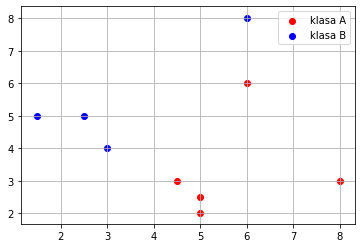

In [61]:
klasa_a = y>0
klasa_b = y<0

plt.scatter(X[klasa_a,0], X[klasa_a,1], c='r', label='klasa A')
plt.scatter(X[klasa_b,0], X[klasa_b,1], c='b', label='klasa B')

plt.grid(True)
plt.legend()

In [43]:
clf = svm.LinearSVC()
clf.fit(X, y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

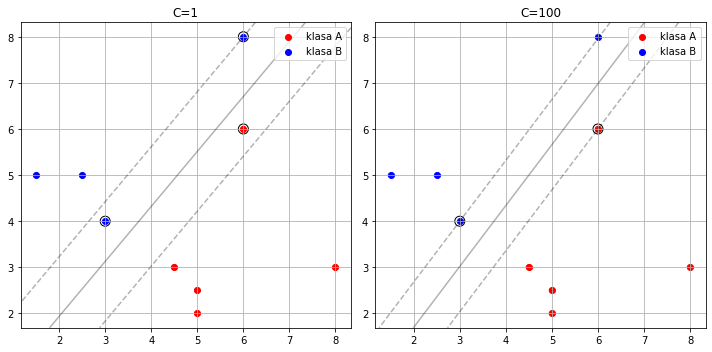

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import LinearSVC

# X, y = make_blobs(n_samples=40, centers=2, random_state=0)

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
    # "hinge" is the standard SVM loss
    clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)
    # obtain the support vectors through the decision function
    decision_function = clf.decision_function(X)
    # we can also calculate the decision function manually
    # decision_function = np.dot(X, clf.coef_[0]) + clf.intercept_[0]
    # The support vectors are the samples that lie within the margin
    # boundaries, whose size is conventionally constrained to 1
    support_vector_indices = np.where( np.abs(decision_function) <= 1 + 1e-15)[0]
    support_vectors = X[support_vector_indices]

    plt.subplot(1, 2, i + 1)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                         np.linspace(ylim[0], ylim[1], 50))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.3, linestyles=['--', '-', '--'])
    plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("C=" + str(C))
    klasa_a = y>0
    klasa_b = y<0

    plt.scatter(X[klasa_a,0], X[klasa_a,1], c='r', label='klasa A')
    plt.scatter(X[klasa_b,0], X[klasa_b,1], c='b', label='klasa B')

    plt.grid(True)
    plt.legend()


plt.tight_layout()
plt.show()

In [46]:
clf = LinearSVC(C=C, loss="hinge", random_state=42).fit(X, y)

In [47]:
_X = 10*np.random.random(size=200)
_X = _X.reshape(100, 2)


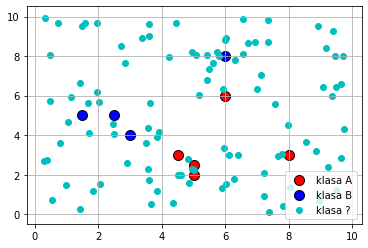

In [56]:
klasa_a = y>0
klasa_b = y<0

plt.scatter(X[klasa_a,0], X[klasa_a,1], c='r', label='klasa A', edgecolors='k', linewidth=1, s=100)
plt.scatter(X[klasa_b,0], X[klasa_b,1], c='b', label='klasa B', edgecolors='k', linewidth=1, s=100)
plt.scatter(_X[:,0], _X[:,1], c='c', label='klasa ?')

plt.grid(True)
plt.legend()

In [53]:
_y = clf.predict(_X)

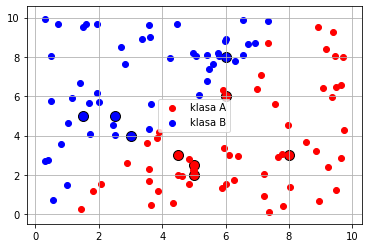

In [57]:

klasa_a = y>0
klasa_b = y<0

plt.scatter(X[klasa_a,0], X[klasa_a,1], c='r', edgecolors='k', linewidth=1, s=100)
plt.scatter(X[klasa_b,0], X[klasa_b,1], c='b', edgecolors='k', linewidth=1, s=100)

klasa_a = _y>0
klasa_b = _y<0

plt.scatter(_X[klasa_a,0], _X[klasa_a,1], c='r', label='klasa A')
plt.scatter(_X[klasa_b,0], _X[klasa_b,1], c='b', label='klasa B')


plt.grid(True)
plt.legend()
